In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
import torch
import torchvision
import torchvision.transforms as transforms

tfkl = tfk.layers

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("SPAM_detection.csv")

In [ ]:
df["Message"] = df["Message"].str.lower()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english",max_features=1000)
X = tfidf.fit_transform(df["Message"]).toarray()
Y = df["category_val"].values

X_train =X[:, :, None]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size=0.2, random_state=0)

In [ ]:
#LSTM
model = tfk.Sequential()
model.add(tfkl.LSTM(64, input_shape=X_train.shape[1:]))
model.add(tfkl.Dense(8,activation="relu"))
model.add(tfkl.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.Adam(),metrics=["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
140/140 [==============================] - 42s 303ms/step - loss: 0.4280 - accuracy: 0.8676 - val_loss: 0.4115 - val_accuracy: 0.8565
Epoch 2/20
140/140 [==============================] - 34s 242ms/step - loss: 0.3915 - accuracy: 0.8683 - val_loss: 0.4159 - val_accuracy: 0.8565
Epoch 3/20
140/140 [==============================] - 34s 240ms/step - loss: 0.3901 - accuracy: 0.8683 - val_loss: 0.4113 - val_accuracy: 0.8565
Epoch 4/20
140/140 [==============================] - 34s 244ms/step - loss: 0.3910 - accuracy: 0.8683 - val_loss: 0.4147 - val_accuracy: 0.8565
Epoch 5/20
140/140 [==============================] - 34s 244ms/step - loss: 0.3908 - accuracy: 0.8683 - val_loss: 0.4166 - val_accuracy: 0.8565
Epoch 6/20
140/140 [==============================] - 34s 245ms/step - loss: 0.3912 - accuracy: 0.8683 - val_loss: 0.4125 - val_accuracy: 0.8565
Epoch 7/20
140/140 [==============================] - 35s 250ms/step - loss: 0.3903 - accuracy: 0.8683 - val_loss: 0.4111 - val_ac

In [ ]:
cnn1d_model = tfk.Sequential()
cnn1d_model.add(tfkl.Conv1D(16, 3, activation='relu',input_shape=X_train.shape[1:]))
cnn1d_model.add(tfkl.MaxPooling1D(pool_size=2,strides=1, padding='valid'))
cnn1d_model.add(tfkl.Conv1D(32, 3, activation='relu'))
cnn1d_model.add(tfkl.MaxPooling1D(pool_size=2,strides=1, padding='valid'))
cnn1d_model.add(tfkl.Flatten())
cnn1d_model.add(tfkl.Dense(8,activation="relu"))
cnn1d_model.add(tfkl.Dense(1,activation="sigmoid"))
cnn1d_model.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.Adam(),metrics=["accuracy"])
cnn1d_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 998, 16)           64        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 997, 16)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 995, 32)           1568      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 994, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31808)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 254472    
_________________________________________________________________
dense_22 (Dense)             (None, 1)               

In [ ]:
cnn1d_model.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
140/140 [==============================] - 3s 24ms/step - loss: 0.2897 - accuracy: 0.8670 - val_loss: 0.1769 - val_accuracy: 0.9641
Epoch 2/10
140/140 [==============================] - 3s 25ms/step - loss: 0.1440 - accuracy: 0.9697 - val_loss: 0.1622 - val_accuracy: 0.9749
Epoch 3/10
140/140 [==============================] - 4s 26ms/step - loss: 0.1059 - accuracy: 0.9735 - val_loss: 0.1021 - val_accuracy: 0.9767
Epoch 4/10
140/140 [==============================] - 4s 26ms/step - loss: 0.0557 - accuracy: 0.9814 - val_loss: 0.0936 - val_accuracy: 0.9794
Epoch 5/10
140/140 [==============================] - 3s 25ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.1060 - val_accuracy: 0.9785
Epoch 6/10
140/140 [==============================] - 3s 25ms/step - loss: 0.0346 - accuracy: 0.9904 - val_loss: 0.0921 - val_accuracy: 0.9821
Epoch 7/10
140/140 [==============================] - 3s 25ms/step - loss: 0.0264 - accuracy: 0.9937 - val_loss: 0.0943 - val_accuracy: 0.9803

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y_pred_lstm = model.predict(X_test).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_lstm)

y_pred_cnn = cnn1d_model.predict(X_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)

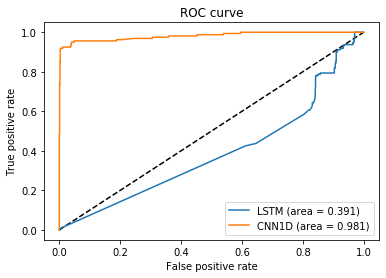

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

auc_lstm = auc(fpr_lstm, tpr_lstm)
auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm))
plt.plot(fpr_cnn, tpr_cnn, label='CNN1D (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0.00B [00:00, ?B/s]

100%|█████████▉| 170M/170M [00:31<00:00, 5.91MB/s] 

Files already downloaded and verified


171MB [00:50, 5.91MB/s]                           

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
import numpy as np

dataiter = iter(trainloader)
images, labels = dataiter.next()

for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.183
[1,  4000] loss: 1.193
[1,  6000] loss: 1.172
[1,  8000] loss: 1.174
[1, 10000] loss: 1.154
[1, 12000] loss: 1.162
[2,  2000] loss: 1.074
[2,  4000] loss: 1.081
[2,  6000] loss: 1.073
[2,  8000] loss: 1.098
[2, 10000] loss: 1.076
[2, 12000] loss: 1.077
Finished Training
